In [1]:
import numpy as np
from matplotlib import pyplot as plt


I am implementing value iteration and policy iteration algorithms as given in Chapter 4 of **'Reinforcement Learning: An Introduction' by Sutton and Barto.**
(Figure 4.3:Policy Iteration and Figure 4.5:Value Iteration)

In [2]:
##Initializing the states

grid_type = ['Normal', 'GreyIn', 'BrownIn', 'Goal']
##              0         1         2          3

Grid = np.zeros([10,10], dtype='uint8')
Grid[0][0] = 1
Grid[7][9] = 2
Grid[9][9] = 3 #Goal 1


print(np.flip(Grid.T, axis=0))
print(Grid[9, 9])

[[0 0 0 0 0 0 0 2 0 3]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]
3


In [3]:
## Implementing probablity function
## a is a string in 'up', 'down', 'left', 'right'

actions = ['up', 'down', 'left', 'right']

def p (s, a, sf):
  if grid_type[Grid[s[0]][s[1]]] == 'GreyIn':
    if sf[0] == 2 and sf[1] >= 3 and sf[1] <=7:
      return 1/4
    else:
      return 0
  elif grid_type[Grid[s[0]][s[1]]] == 'BrownIn':
    if sf == [7, 1]:
      return 1
    else:
      return 0
  elif grid_type[Grid[s[0]][s[1]]] == 'Goal':
    if sf == s:
      return 1
    else:
      return 0
  c = {}
  if (s[1] < 9):
    c['up'] = [s[0], s[1] + 1]
  else:
    c['up'] = [s[0], s[1]]
  if (s[1] > 0):
    c['down'] = [s[0], s[1]-1]
  else:
    c['down'] = [s[0], s[1]]
  if (s[0] < 9):
    c['right'] = [s[0]+1, s[1]]
  else:
    c['right'] = [s[0], s[1]]
  if (s[0] > 0):
    c['left'] = [s[0]-1, s[1]]
  else:
    c['left'] = [s[0], s[1]]

  p = 0
  for key, value in c.items():
    if sf == value and key == a:
      p += 0.8
    elif sf == value:
      p += 0.2/3
  
  return p  




In [4]:
## Sanity check for probability function

print (p ([0, 9], 'down', [0, 9]))


0.13333333333333333


I am modelling the problem as an infinite horizon problem such that the Goal state only has a transition to itself with probability 1.

Reaching the Goal state from any other state entails an Reward of +10 but reaching Goal from itself (after termination) would not not entail any rewards. (Although it wouldn't affect the policies since it would just mean scaling reward by 1/(1-alpha).

In [5]:


## Reward Function
def r (s, sf):
  if s != sf and grid_type[Grid[sf[0]][sf[1]]] == 'Goal':
    return 10
  else:
    return 0

## Sanity check for reward function
print(r([9,9],[9,9]))
print (r([3,4], [9,9]))

0
10


In [6]:
## Choose 3 random states for question 2b. 
random_states = {}
random_states[(5, 5)] = []
random_states[(7, 2)] = []
random_states[(2, 8)] = []
random_states[(9, 9)] = []
random_states[(1, 8)] = []
# random_states[(1, 4)] = []
# random_states[(3, 6)] = []
# random_states[(3, 0)] = []


random_statesPI = {}
random_statesPI[(5, 5)] = []
random_statesPI[(7, 2)] = []
random_statesPI[(2, 8)] = []
random_statesPI[(9, 9)] = []
random_statesPI[(1, 8)] = []
# random_statesPI[(1, 4)] = []
# random_statesPI[(3, 6)] = []
# random_statesPI[(3, 0)] = []


## Initializing policy with all 'up'.
piVI = {}
for i in range(10):
  for j in range(10):
    piVI[(i,j)] = 'up'


In the following cell, I am going to implement value iteration. I am implementing the **Gauss-Seidel method (Asynchronous value iteration)** since it is more natural to implement when we are not doing any parallel processing.

In [7]:
## Value Iteration. I am using loops instead of matrices.

## Initializing v with zeros. 
v = np.zeros([10, 10])

alpha = 0.7

delta_history = []

# for l in range(5):  ###This for loop is there for 2(c)
while (True):
  delta = 0
  #Per state iteration
  for i in range(0, 10):
    for j in range(0, 10):
      prev_v = v[i, j]
      max_val = -183303 #-infty
      for a in actions:
        val = 0
        for k in range(0, 10):
          for l in range(0, 10):       
            val += p([i, j], a, [k, l])*(r([i, j],[k, l]) + alpha*v[k, l])
          
    
        if (val > max_val):
          max_val = val
          piVI[(i, j)] = a
          # print(a)

      
      v[i, j] = max_val
      if (i, j) in random_states.keys():
        random_states[(i, j)].append(max_val)


      delta = max(delta, abs(prev_v - max_val))
  
  print (delta)
  delta_history.append(delta)
  ## Obtaining pi* from the obtained v (or J).
  if (delta == 0):
    piStrVI = piVI
    break
      
        
piStrVI = piVI

8.0
4.853333333333333
2.926933333333333
1.765916444444444
1.070867342222222
0.6491495841185182
0.39379361731318496
0.2388681452971297
0.1449117867395248
0.18505245614495058
0.26793452318316446
0.24210512677866947
0.15530892279048003
0.08674624269852949
0.042819447834619107
0.018208048821974132
0.00716790082870189
0.0027706590180216484
0.0010858353690372802
0.0004381086157845271
0.0001840923309006648
8.161785214544359e-05
3.74703272232324e-05
1.7165279441844206e-05
7.639945873272325e-06
3.270765542850995e-06
1.3505707219252372e-06
5.429079001917358e-07
2.1493836377395326e-07
8.485080060793848e-08
3.384735691724927e-08
1.3793140185569541e-08
5.759031029839434e-09
2.447055447163393e-09
1.045265873855783e-09
4.436879752489631e-10
1.858051490444268e-10
7.658629286311225e-11
3.1122437960107163e-11
1.2526868431450566e-11
5.027978033922409e-12
2.0268231537556858e-12
8.253397965063414e-13
3.397282455352979e-13
1.412203687323199e-13
5.906386491005833e-14
2.4646951146678475e-14
1.021405182655144e

In [8]:
print(v)

[[1.00997078 0.63267908 0.39670626 0.24896967 0.15646035 0.09934168
  0.07452499 0.1036306  0.12558676 0.10196619]
 [0.63267908 0.40837417 0.26302353 0.16915927 0.10928361 0.07735943
  0.10995556 0.15974277 0.19666345 0.15462255]
 [0.39670628 0.26302355 0.16986287 0.11030586 0.07806065 0.11159343
  0.17038029 0.25106748 0.31452205 0.23834068]
 [0.24896999 0.16915978 0.11030652 0.07812263 0.11179543 0.17212395
  0.2648658  0.39461437 0.50447389 0.36665126]
 [0.15646613 0.10929333 0.07807434 0.11180405 0.17227577 0.26667631
  0.4115481  0.61963458 0.81119725 0.5622789 ]
 [0.09944638 0.07754215 0.11177303 0.17227736 0.26677899 0.41321204
  0.63897593 0.97171034 1.30803425 0.85905885]
 [0.07641176 0.11160135 0.17219155 0.2667328  0.41324395 0.64017605
  0.99132257 1.52130998 2.11561157 1.29065516]
 [0.11249462 0.17120502 0.26565103 0.41230652 0.63960313 0.99168996
  1.53684705 2.37673792 3.43454452 0.11984351]
 [0.16723237 0.25677068 0.40144725 0.6275182  0.97995141 1.52855549
  2.38105719

In [9]:
print (piStrVI)

{(0, 0): 'up', (0, 1): 'down', (0, 2): 'down', (0, 3): 'down', (0, 4): 'down', (0, 5): 'down', (0, 6): 'right', (0, 7): 'right', (0, 8): 'right', (0, 9): 'right', (1, 0): 'left', (1, 1): 'down', (1, 2): 'down', (1, 3): 'down', (1, 4): 'down', (1, 5): 'right', (1, 6): 'right', (1, 7): 'right', (1, 8): 'right', (1, 9): 'right', (2, 0): 'left', (2, 1): 'left', (2, 2): 'down', (2, 3): 'down', (2, 4): 'right', (2, 5): 'right', (2, 6): 'right', (2, 7): 'right', (2, 8): 'right', (2, 9): 'right', (3, 0): 'left', (3, 1): 'left', (3, 2): 'left', (3, 3): 'right', (3, 4): 'right', (3, 5): 'right', (3, 6): 'right', (3, 7): 'right', (3, 8): 'right', (3, 9): 'right', (4, 0): 'left', (4, 1): 'left', (4, 2): 'up', (4, 3): 'right', (4, 4): 'right', (4, 5): 'right', (4, 6): 'right', (4, 7): 'right', (4, 8): 'right', (4, 9): 'right', (5, 0): 'left', (5, 1): 'up', (5, 2): 'up', (5, 3): 'up', (5, 4): 'right', (5, 5): 'right', (5, 6): 'right', (5, 7): 'right', (5, 8): 'right', (5, 9): 'down', (6, 0): 'right'

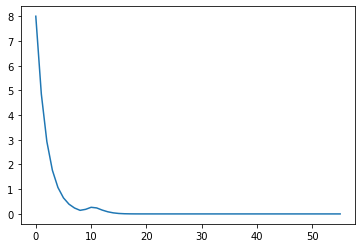

/media/ravi/Projects/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


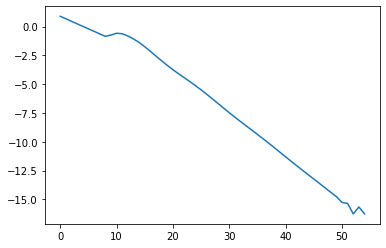

In [10]:
## Plot |J_i+1 - J_i|  vs iterations 
plt.plot (delta_history)
plt.show()

## Ploting the same on exponential scale.
plt.plot (np.log10(delta_history))
plt.show()



We can clearly see that the delta converges to 0 exponentially.

In [11]:
## Initializing policy with all 'up'.
piPI = {}
for i in range(10):
  for j in range(10):
    piPI[(i,j)] = 'up'

## Maintaing pi_i+1 != pi_i history vector
diff_history = []

## Initializing v_PI (J) with all zeros.
v_PI = np.zeros([10, 10])

This cell will implement policy iteration. The policy evaluation is done using an asynchronous value iteration like scheme.

In [12]:
## Policy iteration


# for l in range(4): ### This for loop is there for 2(d)
while(True):
  ## Policy Evaluation
  while (True):
    delta = 0
    #Per state iteration
    for i in range(0, 10):
      for j in range(0, 10):
        prev_v = v_PI[i, j]
        a = piPI [(i, j)]
        val = 0
        for k in range(0, 10):
          for l in range(0, 10):       
            val += p([i, j], a, [k, l])*(r([i, j],[k, l]) + alpha*v_PI[k, l])
          
        v_PI[i, j] = val
        delta = max(delta, abs(prev_v - val))
    
    #Ending Policy Evaluation Step  once J is found.
    if (delta < 1e-13):
      break


  ## Policy improvement
    
  diff = 0
  for i in range(0, 10):
    for j in range(0, 10):
      prev_action = piPI[(i,j)]
      max_val = -183303 #-infty
      for a in actions:
        val = 0
        for k in range(0, 10):
          for l in range(0, 10):       
            val += p([i, j], a, [k, l])*(r([i, j],[k, l]) + alpha*v_PI[k, l])
          
        if (val > max_val):
          max_val = val
          piPI[(i, j)] = a
      if (i, j) in random_statesPI.keys():
        random_statesPI[(i, j)].append(max_val)

         
    
      if (piPI[(i, j)] != prev_action):
        diff += 1
  diff_history.append(diff)
  print (diff)
  if (diff == 0):
    piStrPI = piPI
    break    


      
piStrPI = piPI



88
57
39
20


 As we can see that both policy iteration and value iteration give similar J* as should be expected. The are exactly the same because in both the cases I am terminating value iteration only when the delta is exactly zero.

In [13]:

print(v_PI - v)

[[-8.08030176e-02 -5.06219566e-02 -3.17836308e-02 -2.03622398e-02
  -1.67661976e-02 -4.66523612e-02 -2.50856681e-03 -1.38434042e-04
  -7.91558472e-06 -5.74238047e-07]
 [-5.06219588e-02 -3.27144151e-02 -2.14684524e-02 -1.78017040e-02
  -5.15102258e-02 -4.88314131e-03 -3.71303411e-04 -2.59606099e-05
  -1.89131734e-06 -2.70086677e-07]
 [-3.17836764e-02 -2.14692657e-02 -1.78799490e-02 -5.19711911e-02
  -5.18788715e-03 -5.08737654e-04 -4.49027446e-05 -3.72250113e-06
  -5.31828942e-07 -2.54327463e-07]
 [-2.03623318e-02 -1.78190868e-02 -5.20709317e-02 -5.30468925e-03
  -5.98237989e-04 -6.54658288e-05 -6.53650871e-06 -6.97724817e-07
  -4.60682377e-07 -3.66135926e-07]
 [-1.67501455e-02 -5.17731218e-02 -5.42734349e-03 -7.52629319e-04
  -1.88445270e-04 -2.41105864e-05 -2.41681214e-06 -3.52629488e-07
  -6.89672961e-07 -5.63718672e-07]
 [-4.60604404e-02 -5.13612201e-03 -9.46860105e-04 -4.33941092e-04
  -2.21927920e-04 -2.16939593e-05 -1.73242557e-06 -3.12678021e-07
  -1.11680631e-06 -8.71679856e-07

In [14]:
print (piPI)

{(0, 0): 'up', (0, 1): 'down', (0, 2): 'down', (0, 3): 'down', (0, 4): 'down', (0, 5): 'down', (0, 6): 'right', (0, 7): 'right', (0, 8): 'right', (0, 9): 'right', (1, 0): 'left', (1, 1): 'left', (1, 2): 'down', (1, 3): 'down', (1, 4): 'down', (1, 5): 'right', (1, 6): 'right', (1, 7): 'right', (1, 8): 'right', (1, 9): 'right', (2, 0): 'left', (2, 1): 'left', (2, 2): 'left', (2, 3): 'down', (2, 4): 'right', (2, 5): 'right', (2, 6): 'right', (2, 7): 'right', (2, 8): 'right', (2, 9): 'right', (3, 0): 'left', (3, 1): 'left', (3, 2): 'left', (3, 3): 'up', (3, 4): 'right', (3, 5): 'right', (3, 6): 'right', (3, 7): 'right', (3, 8): 'right', (3, 9): 'right', (4, 0): 'left', (4, 1): 'left', (4, 2): 'up', (4, 3): 'up', (4, 4): 'up', (4, 5): 'right', (4, 6): 'right', (4, 7): 'right', (4, 8): 'right', (4, 9): 'right', (5, 0): 'left', (5, 1): 'up', (5, 2): 'up', (5, 3): 'up', (5, 4): 'up', (5, 5): 'right', (5, 6): 'right', (5, 7): 'right', (5, 8): 'right', (5, 9): 'down', (6, 0): 'right', (6, 1): 'u

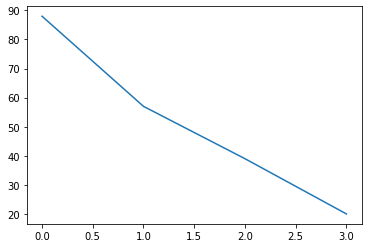

In [15]:
## Policy iteration converges in 6 steps hence we don't have a sufficiently good curve. But we should have expected an exponential curve.
plt.plot(diff_history, label='Policy Iteration')

plt.show()


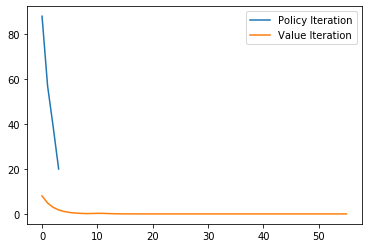

In [16]:
## Simultaneous plots after scaling down to similar scales

plt.plot(diff_history, label='Policy Iteration')
plt.plot(delta_history, label='Value Iteration')
plt.legend()
plt.show()


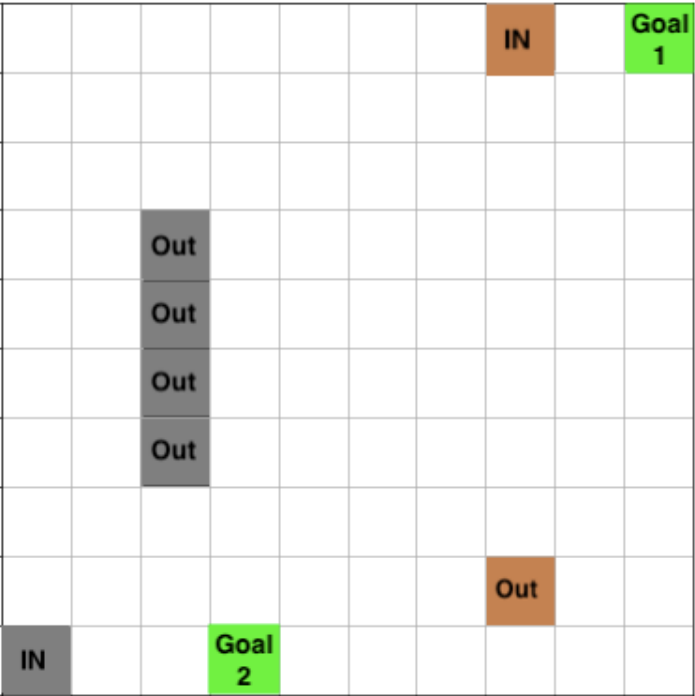

In [17]:
!ls -a
# !conda install -c conda-forge opencv
import cv2
grIm = cv2.imread('grid.png')

 .	  'Assignment_1(CS2800).pdf'   J_PI.png    pi_VI.png
 ..	   grid.png		       J_VI.png    RL_Assignment_goal2.ipynb
 ans.png   .ipynb_checkpoints	       pi_PI.png   RL_Assignment.ipynb


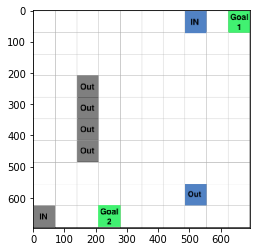

In [18]:
plt.imshow(grIm)
plt.show()

In [19]:
[w, h, channels] = (np.shape(grIm))

In [20]:
def draw_arrow(dirc, im, cellt):
    cell = [cellt[0], 9 - cellt[1]]
    
    if dirc == 'down':
        start_point = (cell[0]*w//10 + 30, cell[1]*h//10 + 7)  
        end_point = (cell[0]*w//10 + 30, cell[1]*h//10 + 53)
    if dirc == 'up':
        start_point = (cell[0]*w//10 + 30, cell[1]*h//10 + 53)  
        end_point = (cell[0]*w//10 + 30, cell[1]*h//10 + 7)
    if dirc == 'right':
        start_point = (cell[0]*w//10 + 7, cell[1]*h//10 + 30)  
        end_point = (cell[0]*w//10 + 53, cell[1]*h//10 + 30)
    if dirc == 'left':
        start_point = (cell[0]*w//10 + 53, cell[1]*h//10 + 30)  
        end_point = (cell[0]*w//10 + 7, cell[1]*h//10 + 30)
    
    
    color = (255, 0, 0)  
  
  
    thickness = 4
    return cv2.arrowedLine(im, start_point, end_point, color, thickness, tipLength = 0.5)  

In [21]:
# ar = draw_arrow('right', grIm, (3, 7))
# plt.imshow(ar, aspect = 1)
# plt.show()

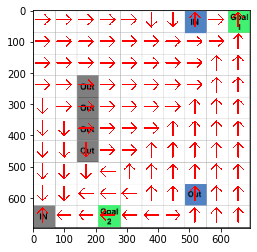

In [22]:
# Policy for value iteration

grIm = cv2.imread('grid.png')
for key, val in piStrVI.items():
    grIm = draw_arrow(val, grIm, key)
plt.imshow(grIm)
cv2.imwrite('pi_VI.png', grIm)

plt.show()

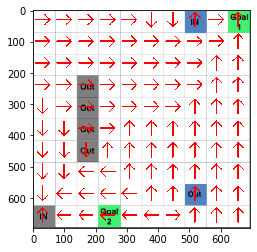

In [23]:
# Policy for policy iteration

grIm = cv2.imread('grid.png')
for key, val in piStrPI.items():
    grIm = draw_arrow(val, grIm, key)
plt.imshow(grIm)
cv2.imwrite('pi_PI.png', grIm)

plt.show()

In [24]:
print (piStrPI == piStrVI)

False


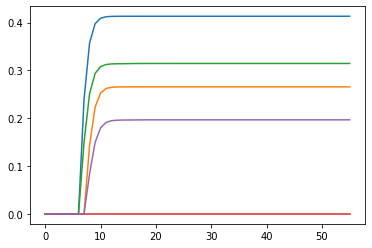

In [25]:
# Value 
for key, value in random_states.items():
    plt.plot(value)
# plt.show()





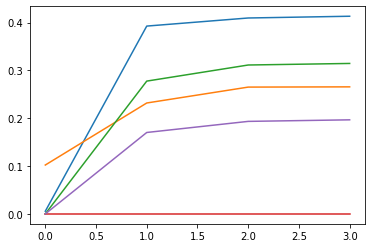

In [26]:
#Policy

for key, value in random_statesPI.items():
    plt.plot(value)
plt.show()

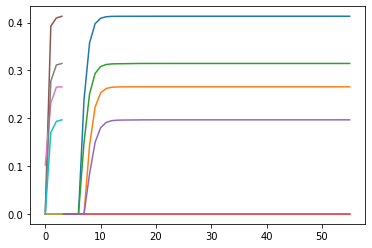

In [27]:
# Both
for key, value in random_states.items():
    plt.plot(value)
# plt.show()



for key, value in random_statesPI.items():
    plt.plot(value)
plt.show()

In [28]:
# Function to inscribe J on the image.
def plot_J(im, J):
    for i in range(10):
        for j in range(10):
            a = i
            b = 9 - j
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(im,str(round(J[i][j], 1)),(a*w//10 + 7 , b*h//10 + 50 ), font, 1,(0,0,255),2,cv2.LINE_AA)

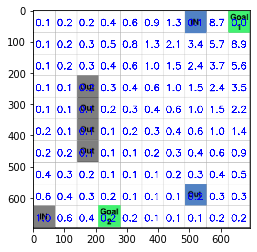

In [29]:
grIm = cv2.imread('grid.png')

plot_J(grIm, v)
cv2.imwrite('J_VI.png', grIm)
plt.imshow(grIm)
plt.show()

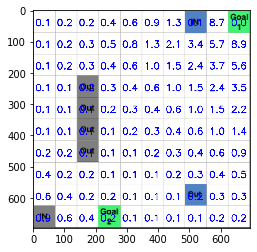

In [30]:
grIm = cv2.imread('grid.png')

plot_J(grIm, v_PI)
cv2.imwrite('J_PI.png', grIm)
plt.imshow(grIm)
plt.show()